In [82]:
import tensorflow as tf
from tensorflow import keras


In [83]:
tf.__version__

'2.3.0'

Here we are using MNIST DATA sets for classifing images


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

now we are going to load the datasets.Mnist dataset as it is available in keras so.


In [85]:
fashions_mnist = keras.datasets.fashion_mnist
fashions_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

Load the dataset into train and test datasets

In [86]:
(train_images, train_labels), (test_images, test_labels) = fashions_mnist.load_data()

In [87]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
train_labels[:5]

In [ ]:
test_images[:5]

In [ ]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

In [88]:
class_names =['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel_boot']

In [ ]:
class_names[0]

'T_shirt/top'

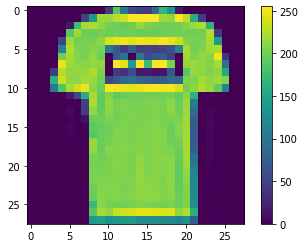

In [89]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Now we need to pre-process the data

In [90]:
train_images = train_images/255.0
test_images = test_images/255.0

In [91]:
train_images[0:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

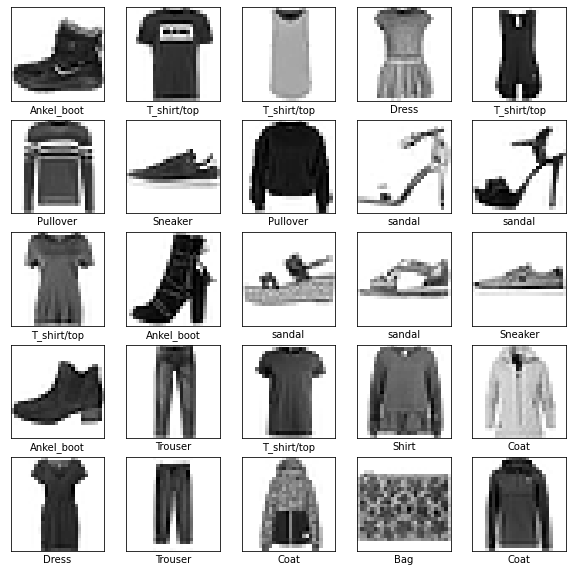

In [92]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [93]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [96]:
 model.fit(train_images, train_labels,epochs =15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5011 - accuracy: 0.8253
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8658
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3372 - accuracy: 0.8773
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8953
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9013
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.9036
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9082
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [126]:
model.save('my_model.h5')

In [97]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8857
test accuracy: 0.885699987411499


In [98]:
predictions = model.predict(test_images)

In [99]:
predictions[3]

array([4.9418767e-09, 1.0000000e+00, 3.3315701e-11, 2.9870144e-08,
       1.6762527e-09, 9.2825573e-17, 3.1580072e-10, 1.0135978e-26,
       7.6066168e-15, 1.3381561e-18], dtype=float32)

now lets see which label has the highest confidence value.

In [100]:
np.argmax(predictions[3])

1

In [101]:
test_labels[3]

1

In [102]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array ,true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'green'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                                   color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = 'red')
  plt.ylim(0, 1)
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('yellow')
  thisplot[true_label].set_color('orange')


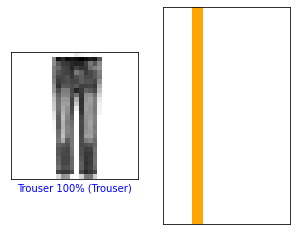

In [103]:
i = 15
plt.figure(figsize = (5,4))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(1, predictions, test_labels)
plt.show()

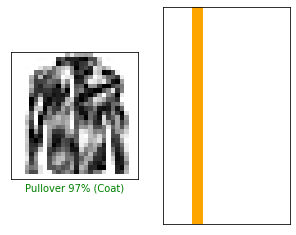

In [104]:
i = 17
plt.figure(figsize = (5,4))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(1, predictions, test_labels)
plt.show()

let us predict some more images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


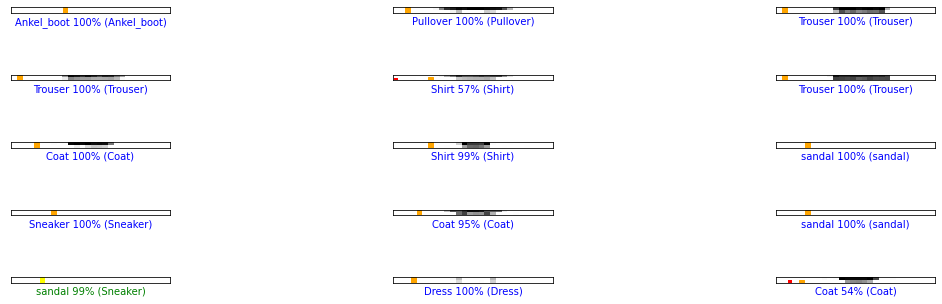

In [105]:
row_num = 5
col_num =3
num_of_img = row_num * col_num
plt.figure(figsize=(2*2*row_num, 2*col_num))
for i in range(num_of_img):
  plt.subplot(row_num, 2*col_num,  2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(row_num, 2*col_num, 2*i+1)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [112]:
img = test_images[0]
print(img.shape)


(28, 28)


In [113]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [114]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.5067799e-12 6.1562577e-16 4.9609646e-14 7.4850845e-14 4.3677063e-12
  7.3374875e-05 2.7111910e-11 2.5932852e-04 6.0999213e-08 9.9966717e-01]]


9

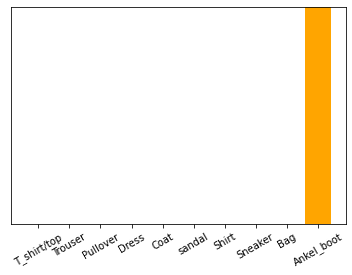

In [122]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation =30)
np.argmax(predictions_single[0])

In [128]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
